<center><b>Perceptron Training Algorithm (PTA)<br>Binary Classification</b></center>

In [1]:
import random
import numpy as np

#Function to get random value in a given range
def getRandomVal(rangeStart, rangeEnd):
    return random.uniform(rangeStart, rangeEnd)

#Function to generate w0
def getInitialWeightW0():
    return getRandomVal(-0.25, 0.25)

#Function to generate w1, w2
def getInitialWeightW1W2():
    return getRandomVal(-1, 1)

#Initializing the weights as global variables
w0 = getInitialWeightW0()
w1 = getInitialWeightW1W2()
w2 = getInitialWeightW1W2()

w = np.array([w0, w1, w2])

print("The initial weights are: ", w)

The initial weights are:  [ 0.22122332 -0.15168434  0.8173991 ]


<b>Generating a linearly separable dataset to apply PTA</b>

In [2]:
#Function to generate a single vector at random
def getVector():
    return np.array([getRandomVal(-1, 1), getRandomVal(-1, 1)])

#Step activation function definition
def stepActivationFn(val):
    if val >= 0:
        return 1
    return 0

#Function to define class S0/S1
def getClass(arr, w):
    sum = np.dot(arr, w)
    return stepActivationFn(sum)

#Function to generate data points of size n along with their labels
def generateDataPointVectors(n):
    if n < 1:
        return
    
    retData = np.zeros(shape=(n, 3))
    retLabels = np.zeros(shape = (n, 1))
    
    for i in range(n):
        x = getVector()
        retData[i] = np.array([[1, x[0], x[1]]])
        retLabels[i] = getClass(retData[i], w)
        
    return retData, retLabels

#Setting initial n=100
n = 100

#3.f. Generating data points for n=100 along with their labels
data, labels = generateDataPointVectors(n)

Generating plot for the generated data points

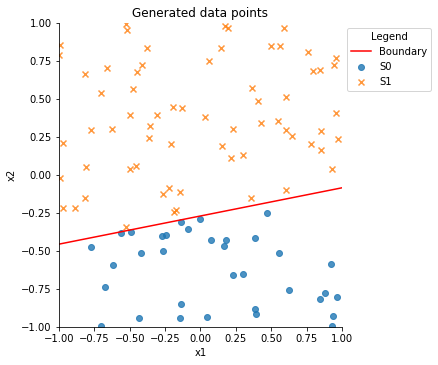

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

#Function to draw the decision boundary for the given optimal weights
def drawBoundary(wt):
    x1 = [-1, 1]
    x2 = [0, 0]
    for i in range(len(x1)):
        x2[i] = ((-1 * wt[0]) - (wt[1] * x1[i])) / wt[2]
    plt.plot(x1, x2, "r")

#Function to draw the scatter plot for the generated data points
def drawScatterPlotForDataPoints(data, wt):
    scat_plot = sns.lmplot(x = 'x',
                           y = 'y',
                           data = data,
                           hue='label',
                           markers = ['o', 'x'],
                           fit_reg = False,
                           legend = False,
                           legend_out = True
                        )

    scat_plot.ax.set_title('Generated data points')
    scat_plot.ax.set_xlabel('x1')
    scat_plot.ax.set_ylabel('x2')
    scat_plot.ax.set_xlim(-1, 1)
    scat_plot.ax.set_ylim(-1, 1)
    drawBoundary(wt)
    scat_plot.ax.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1), labels=['Boundary', 'S0', 'S1'])
    plt.show(scat_plot)
    
#Converting the generated data points for n = 100 into a Pandas dataframe.
df = pd.DataFrame(data, columns=['0', 'x', 'y'])
labels_df = pd.DataFrame(labels, columns=['label'])
df.drop(df.columns[0], axis = 1, inplace=True)
data = pd.concat([df, labels_df], axis=1)
drawScatterPlotForDataPoints(data, w)

<b>Perceptron Training Algorithm</b>

In [4]:
#Function to count the misclassifications for the boundary generated using the given weights
def getMisclassificationsCount(data, weights):
    count = 0
    for index, row in data.iterrows():
        temp = np.array([1, row['x'], row['y']])
        c = getClass(temp, weights)
        if row['label'] != c:
            count = count + 1
    return count

#Function to update weights for PTA
def updateWeightsForPTA(omega, eta, xi, di):
    c = getClass(xi, omega)
    omega = omega + (eta * xi * (di - c))
    return omega

#Function to implement PTA
def PTA(wprimeoriginal, data):
    wprime = wprimeoriginal.copy()
    epoch = 0

    misclassfications_counter = [getMisclassificationsCount(data, wprime)]
    print("Misclassification count for epoch ", epoch, " = ", misclassfications_counter[epoch])

    while(misclassfications_counter[epoch] > 0):
        epoch += 1
        for index, row in data.iterrows():
            xi = np.array([1, row['x'], row['y']])
            wprime = updateWeightsForPTA(wprime, eta, xi, row['label'])
        misclassfications_counter.append(getMisclassificationsCount(data, wprime))
        print("Misclassification count for epoch ", epoch, " = ", misclassfications_counter[epoch])

    print("Final derived weights: ", wprime)
    print("\nOptimal weights: ", w)
    return epoch, misclassfications_counter, wprime

In [5]:
#Setting eta = 1
eta = 1

#Initialize weights
wprimeoriginal = np.array([getInitialWeightW1W2(), getInitialWeightW1W2(), getInitialWeightW1W2()])
print("Initial weights: ", wprimeoriginal)

epoch, misclassifications_counter, wprime = PTA(wprimeoriginal, data)

Initial weights:  [ 0.13718334  0.28633591 -0.15530602]
Misclassification count for epoch  0  =  58
Misclassification count for epoch  1  =  8
Misclassification count for epoch  2  =  5
Misclassification count for epoch  3  =  0
Final derived weights:  [ 1.13718334 -0.55809356  4.05870103]

Optimal weights:  [ 0.22122332 -0.15168434  0.8173991 ]


The final weights are [ 1.13718334, -0.55809356, 4.05870103]
<br>
The relationship with the optimal weights is linear in nature. The obtained weights are approximately 20 times that of the optimal weights.

Plot of epoch vs misclassifications

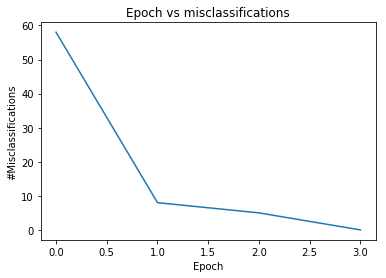

In [6]:
def plotMisclassifications(misclassifications_counter, epoch):
    plt.plot(range(epoch+1), misclassifications_counter)
    plt.title('Epoch vs misclassifications')
    plt.xlabel('Epoch')
    plt.ylabel('#Misclassifications')
    
plotMisclassifications(misclassifications_counter, epoch)

<b>Exploring the impact of learning rate</b>

Setting eta = 10

In [7]:
#Setting eta = 10
eta = 10

print("Initial weights: ", wprimeoriginal)
epoch, misclassifications_counter, wprime = PTA(wprimeoriginal, data)

misclassfications_counter = [getMisclassificationsCount(data, wprime)]

Initial weights:  [ 0.13718334  0.28633591 -0.15530602]
Misclassification count for epoch  0  =  58
Misclassification count for epoch  1  =  5
Misclassification count for epoch  2  =  1
Misclassification count for epoch  3  =  2
Misclassification count for epoch  4  =  1
Misclassification count for epoch  5  =  3
Misclassification count for epoch  6  =  8
Misclassification count for epoch  7  =  8
Misclassification count for epoch  8  =  9
Misclassification count for epoch  9  =  6
Misclassification count for epoch  10  =  5
Misclassification count for epoch  11  =  5
Misclassification count for epoch  12  =  3
Misclassification count for epoch  13  =  3
Misclassification count for epoch  14  =  3
Misclassification count for epoch  15  =  1
Misclassification count for epoch  16  =  1
Misclassification count for epoch  17  =  1
Misclassification count for epoch  18  =  0
Final derived weights:  [ 20.13718334 -12.0210855   76.61543162]

Optimal weights:  [ 0.22122332 -0.15168434  0.81739

The final weights are [ 20.13718334, -12.0210855, 76.61543162]
<br>
The relationship with the optimal weights is linear in nature. The obtained weights are approximately 100 times that of the optimal weights.

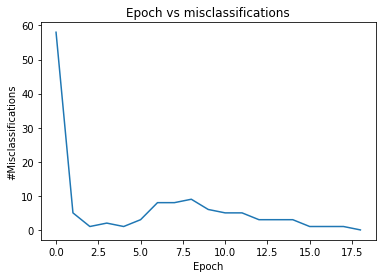

In [8]:
plotMisclassifications(misclassifications_counter, epoch)

Setting eta = 0.1

In [9]:
#Setting eta = 0.1
eta = 0.1

print("Initial weights: ", wprimeoriginal)
epoch, misclassifications_counter, wprime = PTA(wprimeoriginal, data)

misclassfications_counter = [getMisclassificationsCount(data, wprime)]

Initial weights:  [ 0.13718334  0.28633591 -0.15530602]
Misclassification count for epoch  0  =  58
Misclassification count for epoch  1  =  17
Misclassification count for epoch  2  =  15
Misclassification count for epoch  3  =  9
Misclassification count for epoch  4  =  8
Misclassification count for epoch  5  =  6
Misclassification count for epoch  6  =  5
Misclassification count for epoch  7  =  4
Misclassification count for epoch  8  =  1
Misclassification count for epoch  9  =  1
Misclassification count for epoch  10  =  1
Misclassification count for epoch  11  =  1
Misclassification count for epoch  12  =  1
Misclassification count for epoch  13  =  1
Misclassification count for epoch  14  =  2
Misclassification count for epoch  15  =  9
Misclassification count for epoch  16  =  6
Misclassification count for epoch  17  =  6
Misclassification count for epoch  18  =  6
Misclassification count for epoch  19  =  6
Misclassification count for epoch  20  =  7
Misclassification count for

The final weights are [ 0.23718334 -0.10654002  0.8528016 ]
<br>
The relationship with the optimal weights is linear in nature. The obtained weights are approximately 1.1 times that of the optimal weights.

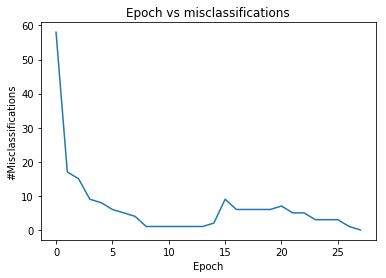

In [10]:
plotMisclassifications(misclassifications_counter, epoch)

<b>Effect of eta</b>
<ul>
    <li>When eta is large, i.e. eta = 10 in this case, the convergence occurs later than when eta = 1. There is a region of plateau in the misclassification graph which indicates there could be an oscillation of the generated error before the minima is reached.
    </li>
    <li>
        When eta is large, i.e. eta = 0.1 in this case, the convergence takes a longer time. This could be because the learning rate is very less, the incremental updates made to the weights are smaller per epoch thus delaying the convergence.
    </li>
    <li>
        The convergence occurs the fastest for eta = 1. This indicates that the optimal eta for this dataset and the initial set of weights is a value that is neither too large nor too small.
    </li>
</ul>

<b>Effect on eta on training performance for different dataset and weights.</b>
<ul>
    <li>The effect of eta will be different for different datasets and will depend on the initial weights (here they are chosen randomly) with respect to the optimal weights. If the intial weights are closer to the optimal weights, then the convergence will occur faster for smaller eta. Conversely, if the initial weights are farther away from the optimal weights, then the training could benefit from larger eta.
    </li>
    <li>Additionally, the distribution of the dataset also influences the optimal eta for the training.
    </li>
    <li>Generally, one can begin with larger eta for initial epochs and utilize smaller epochs as convergence approaches.
    </li>
</ul>

<b>Exploring a linearly separable larger dataset</b>
<br>
Generating data points for n = 1000 and training weights for eta = 1, 10, and 0.1

In [11]:
n = 1000
data, labels = generateDataPointVectors(n)

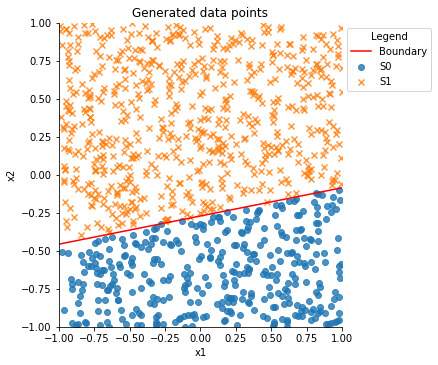

In [12]:
df = pd.DataFrame(data, columns=['0', 'x', 'y'])
labels_df = pd.DataFrame(labels, columns=['label'])
df.drop(df.columns[0], axis = 1, inplace=True)
data = pd.concat([df, labels_df], axis=1)
drawScatterPlotForDataPoints(data, w)

In [13]:
#Setting eta = 1
eta = 1

#Initialize weights
wprimeoriginal = np.array([getInitialWeightW1W2(), getInitialWeightW1W2(), getInitialWeightW1W2()])
print("Initial weights: ", wprimeoriginal)

epoch, misclassifications_counter, wprime = PTA(wprimeoriginal, data)

Initial weights:  [-0.80366334 -0.63736315 -0.90989412]
Misclassification count for epoch  0  =  737
Misclassification count for epoch  1  =  47
Misclassification count for epoch  2  =  3
Misclassification count for epoch  3  =  17
Misclassification count for epoch  4  =  20
Misclassification count for epoch  5  =  27
Misclassification count for epoch  6  =  28
Misclassification count for epoch  7  =  4
Misclassification count for epoch  8  =  3
Misclassification count for epoch  9  =  3
Misclassification count for epoch  10  =  0
Final derived weights:  [ 3.19633666 -2.18849653 11.84820077]

Optimal weights:  [ 0.22122332 -0.15168434  0.8173991 ]


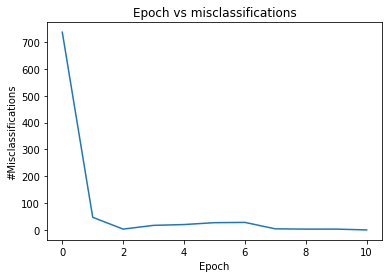

In [14]:
plotMisclassifications(misclassifications_counter, epoch)

In [15]:
#Setting eta = 10
eta = 10

print("Initial weights: ", wprimeoriginal)
epoch, misclassifications_counter, wprime = PTA(wprimeoriginal, data)

misclassfications_counter = [getMisclassificationsCount(data, wprime)]

Initial weights:  [-0.80366334 -0.63736315 -0.90989412]
Misclassification count for epoch  0  =  737
Misclassification count for epoch  1  =  57
Misclassification count for epoch  2  =  16
Misclassification count for epoch  3  =  24
Misclassification count for epoch  4  =  32
Misclassification count for epoch  5  =  6
Misclassification count for epoch  6  =  6
Misclassification count for epoch  7  =  0
Final derived weights:  [ 29.19633666 -20.96883843 109.7589894 ]

Optimal weights:  [ 0.22122332 -0.15168434  0.8173991 ]


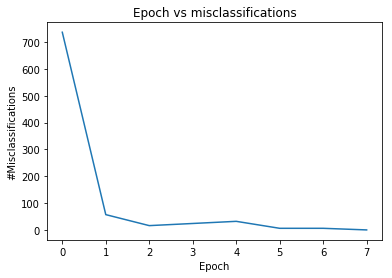

In [16]:
plotMisclassifications(misclassifications_counter, epoch)

In [17]:
#Setting eta = 0.1
eta = 0.1

print("Initial weights: ", wprimeoriginal)
epoch, misclassifications_counter, wprime = PTA(wprimeoriginal, data)

misclassfications_counter = [getMisclassificationsCount(data, wprime)]

Initial weights:  [-0.80366334 -0.63736315 -0.90989412]
Misclassification count for epoch  0  =  737
Misclassification count for epoch  1  =  58
Misclassification count for epoch  2  =  0
Final derived weights:  [ 0.19633666 -0.13928293  0.72519033]

Optimal weights:  [ 0.22122332 -0.15168434  0.8173991 ]


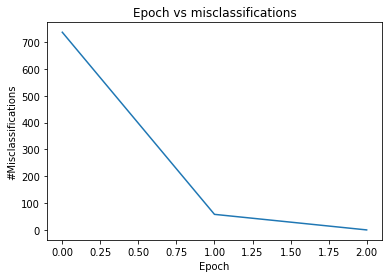

In [18]:
plotMisclassifications(misclassifications_counter, epoch)

<b>Observations</b>
<ul>
    <li>For the newly generated n=1000 data points, the effects of eta are different when compared to the initial set of n=100 data points.
    </li>
    <li>The fastest convergence occurs for eta = 0.1 and the slowest convergence occurs for eta = 1.
    </li>
    <li>This can be considered as the combined effect of the availability of more data points available per epoch resulting in multiple corrections per epoch and the initial weights being closer to the optimal weights.
    </li>
    <li> For eta=10, there is a visible oscillation in the corrections as the number of misclassifications increases a bit before converging. This is more prominent in eta = 1.
    </li>
    <li>When compared to the initial dataset, this dataset leads to 900 more corrections per epoch. This results in requiring a smaller eta for correcting the weights per update. Thus, eta=0.1 seems to be the optimal learning rate for this dataset and initial set of weights.
    </li>
</ul>